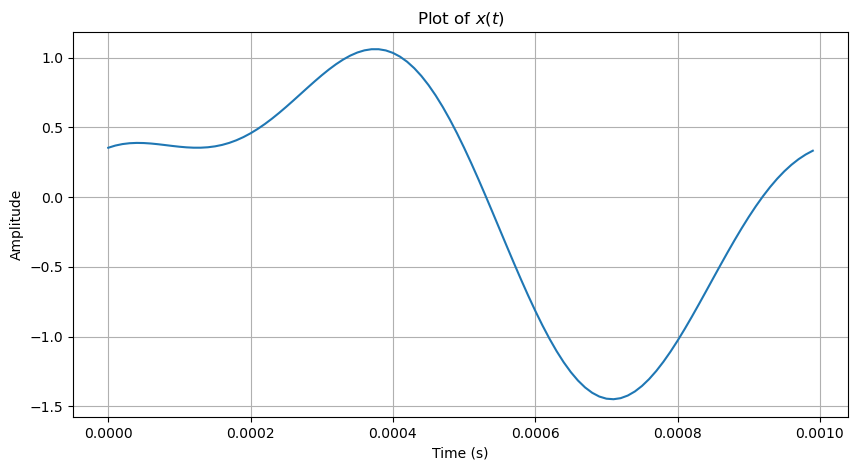

[ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]
[-5.55111512e-17+0.00000000e+00j  5.55111512e-17-4.00000000e+00j
  1.41421356e+00+1.41421356e+00j -3.33066907e-16-7.21644966e-16j
  4.99600361e-16-1.43476297e-16j  1.72084569e-15+9.43689571e-16j
  1.41421356e+00-1.41421356e+00j -2.38697950e-15+4.00000000e+00j]


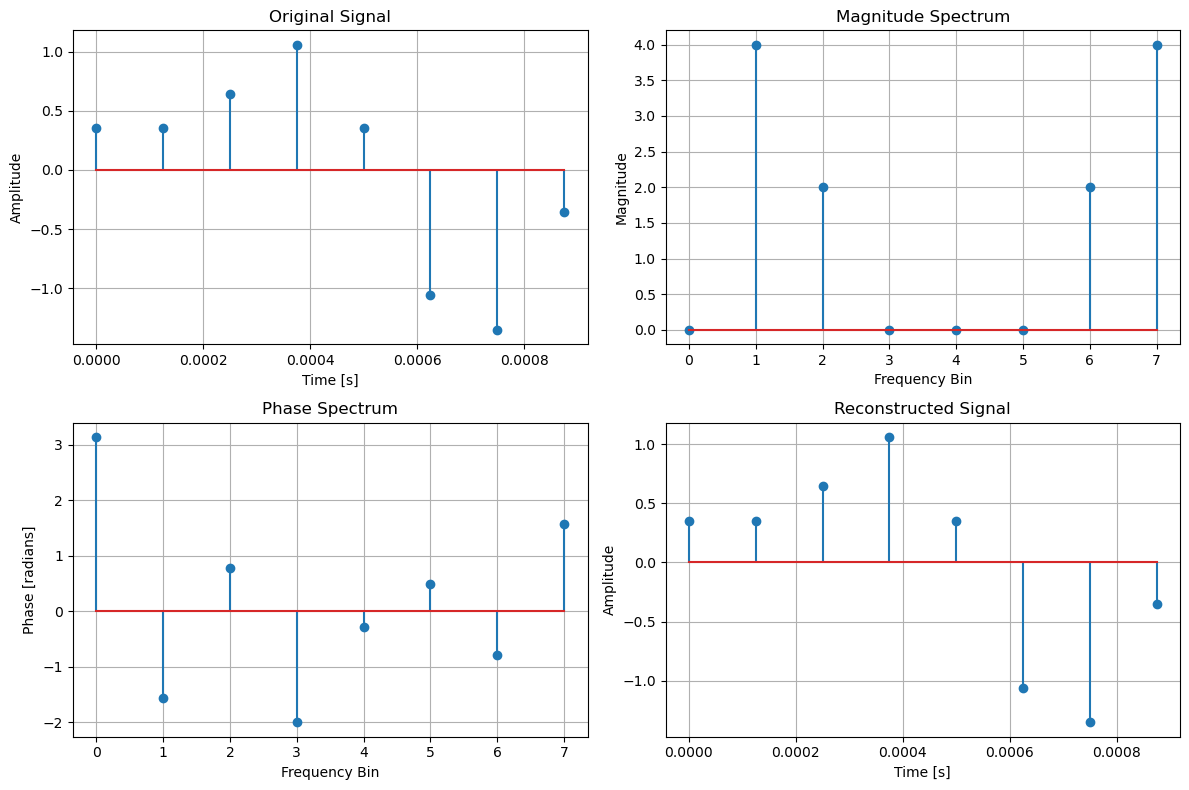

Idft :  [ 0.35355339+3.88578059e-16j  0.35355339-4.44089210e-16j
  0.64644661+1.39570399e-16j  1.06066017+4.44089210e-16j
  0.35355339-1.11022302e-16j -1.06066017+8.32667268e-16j
 -1.35355339-7.65655893e-16j -0.35355339+2.10942375e-15j]
[ 0.35355339  0.35355339  0.64644661  1.06066017  0.35355339 -1.06066017
 -1.35355339 -0.35355339]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


t = np.arange(0, 0.001, 0.00001)
# Signal x(t)
x_t = np.sin(2*np.pi*1000*t) + 0.5*np.sin(2*np.pi*2000*t + 3*np.pi/4)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, x_t)
plt.title('Plot of $x(t)$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


# Parameters
f1 = 1000  # Frequency of the first sine component
f2 = 2000  # Frequency of the second sine component
A1 = 1     # Amplitude of the first sine component
A2 = 0.5   # Amplitude of the second sine component
phi2 = 3 * np.pi / 4  # Phase of the second sine component

# Sampling rate and sampling period
fs = 8000  # Sampling rate (should be at least 2 * f2 to satisfy Nyquist)
T = 1 / fs # Sampling period
N = 8

# Time vector for 8 samples
t = np.arange(0, 8) * T

# Discrete signal
x = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t + phi2)
print(x)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.stem(t, x, use_line_collection=True)
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Compute the 8-point DFT manually
X = np.zeros(N, dtype=complex)

for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
print(X)
# Magnitude and phase spectra
magnitude_spectrum = np.abs(X)
plt.subplot(2, 2, 2)
plt.stem(np.arange(N), magnitude_spectrum, use_line_collection=True)
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.grid(True)

phase_spectrum = np.angle(X)
plt.subplot(2, 2, 3)
plt.stem(np.arange(N), phase_spectrum, use_line_collection=True)
plt.title('Phase Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Phase [radians]')
plt.grid(True)

# Compute the inverse DFT manually
x_reconstructed = np.zeros(N, dtype=complex)
for n in range(N):
    for k in range(N):
        x_reconstructed[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
x_reconstructed /= N

plt.subplot(2, 2, 4)
plt.stem(t, np.real(x_reconstructed), use_line_collection=True)
plt.title('Reconstructed Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
print('Idft : ', x_reconstructed)
print(np.real(x_reconstructed))


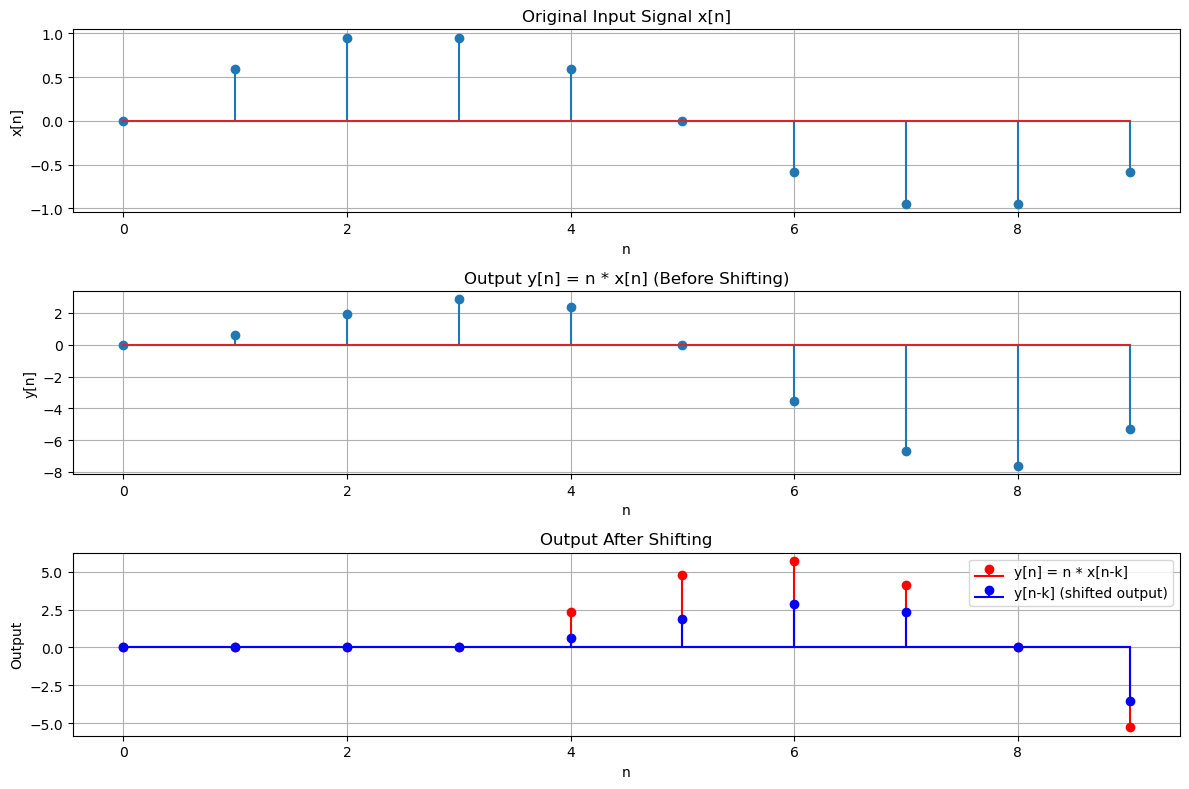

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input signal x[n]
n = np.arange(0, 10)  # Time indices from 0 to 9
x = np.sin(2 * np.pi * 0.1 * n)  # Example input signal (sine wave)

# Define the shift amount
k = 3

# Calculate the output y[n] = n * x[n] before shifting
y = n * x

# Shift the input by k units: x[n - k]
x_shifted = np.roll(x, k)
x_shifted[:k] = 0  # Set the first k values to 0 to simulate the shift

# Calculate the output for the shifted input: y_shifted[n] = n * x[n - k]
y_shifted = n * x_shifted

# Calculate the output of the original input, then shift the output by k units
y_original_shifted = np.roll(y, k)
y_original_shifted[:k] = 0  # Set the first k values to 0 to simulate the shift

# Plot the results
plt.figure(figsize=(12, 8))

# Plot the original input signal x[n]
plt.subplot(3, 1, 1)
plt.stem(n, x, use_line_collection=True)
plt.title('Original Input Signal x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

# Plot the output y[n] = n * x[n] before shifting
plt.subplot(3, 1, 2)
plt.stem(n, y, use_line_collection=True)
plt.title('Output y[n] = n * x[n] (Before Shifting)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)

# Plot the output y[n] after shifting the input by k units and shifted output of original input
plt.subplot(3, 1, 3)
plt.stem(n, y_shifted, linefmt='r-', markerfmt='ro', basefmt='r-', use_line_collection=True, label='y[n] = n * x[n-k]')
plt.stem(n, y_original_shifted, linefmt='b-', markerfmt='bo', basefmt='b-', use_line_collection=True, label='y[n-k] (shifted output)')
plt.title('Output After Shifting')
plt.xlabel('n')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


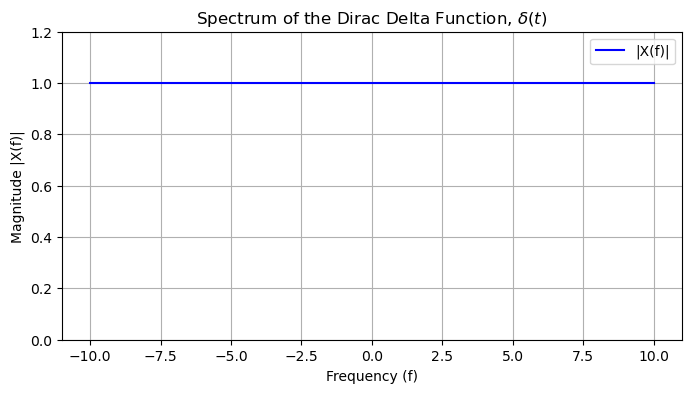

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define frequency range
frequencies = np.linspace(-10, 10, 500)

# Fourier Transform of delta function is constant (1)
spectrum = np.ones_like(frequencies)

# Plot the spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies, spectrum, color='b', label='|X(f)|')
plt.title("Spectrum of the Dirac Delta Function, $\\delta(t)$")
plt.xlabel("Frequency (f)")
plt.ylabel("Magnitude |X(f)|")
plt.ylim(0, 1.2)
plt.grid(True)
plt.legend()
plt.show()
